<a href="https://colab.research.google.com/github/AndreaCastiella/Natural-Language-Processing-in-Tensorflow/blob/main/Course_3_Week_3_Lesson_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.4.1


In [2]:
# Get the data

dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGC0M4Z/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGC0M4Z/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGC0M4Z/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [9]:
NUM_EPOCHS=10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 134s 252ms/step - loss: 0.6072 - acc: 0.6436 - val_loss: 0.6877 - val_acc: 0.5412
Epoch 2/10
391/391 [==============================] - 99s 252ms/step - loss: 0.5832 - acc: 0.7019 - val_loss: 0.4261 - val_acc: 0.8284
Epoch 3/10
391/391 [==============================] - 100s 254ms/step - loss: 0.3612 - acc: 0.8491 - val_loss: 0.3902 - val_acc: 0.8464
Epoch 4/10
391/391 [==============================] - 101s 256ms/step - loss: 0.2543 - acc: 0.9009 - val_loss: 0.3567 - val_acc: 0.8500
Epoch 5/10
391/391 [==============================] - 99s 253ms/step - loss: 0.1998 - acc: 0.9271 - val_loss: 0.3156 - val_acc: 0.8662
Epoch 6/10
391/391 [==============================] - 99s 252ms/step - loss: 0.1600 - acc: 0.9447 - val_loss: 0.3355 - val_acc: 0.8626
Epoch 7/10
391/391 [==============================] - 99s 253ms/step - loss: 0.1297 - acc: 0.9576 - val_loss: 0.3524 - val_acc: 0.8678
Epoch 8/10
391/391 [==============================] 

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

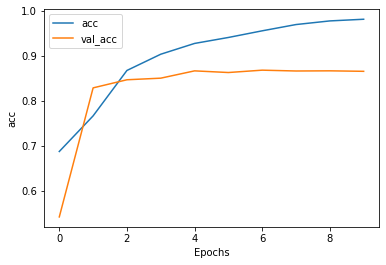

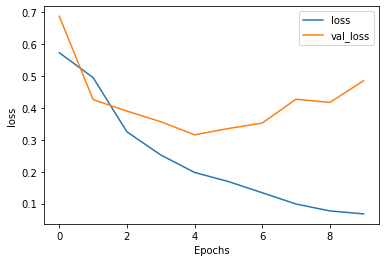

In [11]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')